In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [2]:
dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23-CIC/Dataset/3-ZScore-2-Drop.csv")
clean_dataset = dataset.drop(columns=["Label"])
clean_dataset

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-1.713634,3.396474,0.039735,-0.009041,-0.014835,-0.002925,-0.308333,-0.283807,-0.352035,-0.230478,...,-0.060706,-2.093367,-0.701272,-0.096637,-0.709576,-0.694895,-2.185254,0.228264,-0.884426,-1.108242
1,1.876632,1.760306,-0.027036,-0.002533,-0.012754,-0.002703,-0.065946,0.525943,0.196119,-0.230478,...,-0.035924,-1.513855,-0.700978,-0.097298,-0.709367,-0.694543,-0.920194,1.197350,-0.884425,-1.108242
2,1.876632,-0.575983,-0.032601,-0.005787,-0.013794,-0.002814,-0.065946,0.525943,0.196119,-0.230478,...,-0.060706,-1.513855,-0.701332,-0.097298,-0.709717,-0.694895,0.850890,-0.884569,-0.884421,0.890451
3,1.876632,-0.575153,-0.032601,-0.005787,-0.013794,-0.002814,-0.065946,0.525943,0.196119,-0.230478,...,-0.060706,-1.513855,-0.701332,-0.097298,-0.709717,-0.694895,0.850890,-0.884569,-0.884420,0.890451
4,1.876632,-0.575581,-0.032601,-0.005787,-0.013794,-0.002814,-0.065946,0.525943,0.196119,-0.230478,...,-0.060706,-1.513855,-0.701332,-0.097298,-0.709717,-0.694895,0.850890,-0.884569,-0.884412,0.890451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553579,-0.446481,-0.314037,-0.015908,-0.009041,-0.014835,-0.002925,-0.308333,-0.283807,-0.352035,-0.230478,...,-0.060706,0.804192,-0.701332,-0.097298,-0.709717,-0.694895,0.896227,-0.884569,1.743497,0.916033
553580,-0.446481,-0.312569,-0.015908,-0.009041,-0.014835,-0.002925,-0.308333,-0.283807,-0.352035,-0.230478,...,-0.060706,0.804192,-0.701332,-0.097298,-0.709717,-0.694895,0.896397,-0.884569,1.753357,0.916129
553581,-0.446481,-0.574559,-0.027036,-0.009041,-0.014835,-0.002925,-0.308333,-0.283807,-0.352035,-0.230478,...,-0.060706,0.224680,-0.701332,-0.097298,-0.709717,-0.694895,0.896348,-0.884569,1.750514,0.916101
553582,-0.446481,-0.312314,-0.015908,-0.009041,-0.014835,-0.002925,-0.308333,-0.283807,-0.352035,-0.230478,...,-0.060706,0.804192,-0.701332,-0.097298,-0.709717,-0.694895,0.896391,-0.884569,1.752962,0.916125


## Menghapus feature yang memiliki low variance

In [24]:
tres = 0.05

lv = VarianceThreshold(threshold=tres)
lv.fit_transform(clean_dataset)
lv.variances_

# filtered_cols = clean_dataset.drop(
#     columns=clean_dataset.columns[lv.get_support()].array
# ).columns.array

# lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
# lowvariance_dataset

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
lowvariance_dataset["Label"] = dataset["Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0         0
1         0
2         0
3         0
4         0
         ..
553579    1
553580    1
553581    1
553582    1
553583    1
Name: Label, Length: 553584, dtype: int8

## Cari korelasi antara fitur dengan target

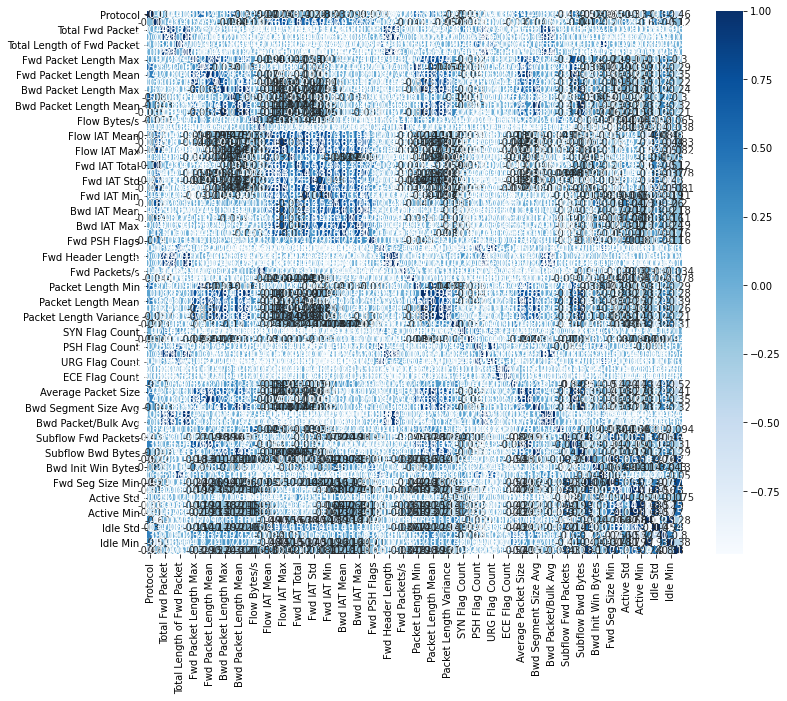

In [5]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [6]:
cor_target = abs(cor["Label"])
cor_target

Protocol                      0.461499
Flow Duration                 0.121915
Total Fwd Packet              0.007084
Total Bwd packets             0.006206
Total Length of Fwd Packet    0.010602
                                ...   
Idle Mean                     0.280578
Idle Std                      0.426254
Idle Max                      0.800398
Idle Min                      0.375629
Label                         1.000000
Name: Label, Length: 72, dtype: float64

In [7]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

Protocol                  0.461499
Fwd Packet Length Max     0.295120
Fwd Packet Length Min     0.292104
Fwd Packet Length Mean    0.349225
Fwd Packet Length Std     0.218079
Bwd Packet Length Max     0.237570
Bwd Packet Length Min     0.301075
Bwd Packet Length Mean    0.318599
Bwd Packet Length Std     0.210701
Packet Length Min         0.289867
Packet Length Max         0.284502
Packet Length Mean        0.392962
Packet Length Std         0.261009
Packet Length Variance    0.214083
FIN Flag Count            0.308043
Down/Up Ratio             0.520386
Average Packet Size       0.408561
Fwd Segment Size Avg      0.349225
Bwd Segment Size Avg      0.318599
Subflow Fwd Packets       0.610033
Subflow Fwd Bytes         0.305020
Subflow Bwd Bytes         0.293831
FWD Init Win Bytes        0.836227
Fwd Seg Size Min          0.750419
Active Mean               0.540557
Active Max                0.524111
Active Min                0.544154
Idle Mean                 0.280578
Idle Std            

## Hasil lowvariance filter + pearson correlation filter

In [8]:
all_feature = set(dataset.columns)
rel_feature = set(relevant_features.index)
removed_feature = list(all_feature - rel_feature)
removed_feature

lowvariance_correlationfilter_dataset = dataset.drop(columns=removed_feature)
lowvariance_correlationfilter_dataset

,Protocol,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Packet Length Min,...,FWD Init Win Bytes,Fwd Seg Size Min,Active Mean,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-1.713634,-0.308333,-0.283807,-0.352035,-0.230478,-0.317744,-0.291855,-0.347381,-0.268724,-0.280766,...,-1.164596,-2.093367,-0.701272,-0.709576,-0.694895,-2.185254,0.228264,-0.884426,-1.108242,Benign
1,1.876632,-0.065946,0.525943,0.196119,-0.230478,-0.146762,0.813811,0.126606,-0.268724,0.538217,...,-1.164596,-1.513855,-0.700978,-0.709367,-0.694543,-0.920194,1.197350,-0.884425,-1.108242,Benign
2,1.876632,-0.065946,0.525943,0.196119,-0.230478,-0.146762,0.813811,0.126606,-0.268724,0.538217,...,-1.164596,-1.513855,-0.701332,-0.709717,-0.694895,0.850890,-0.884569,-0.884421,0.890451,Benign
3,1.876632,-0.065946,0.525943,0.196119,-0.230478,-0.146762,0.813811,0.126606,-0.268724,0.538217,...,-1.164596,-1.513855,-0.701332,-0.709717,-0.694895,0.850890,-0.884569,-0.884420,0.890451,Benign
4,1.876632,-0.065946,0.525943,0.196119,-0.230478,-0.146762,0.813811,0.126606,-0.268724,0.538217,...,-1.164596,-1.513855,-0.701332,-0.709717,-0.694895,0.850890,-0.884569,-0.884412,0.890451,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553579,-0.446481,-0.308333,-0.283807,-0.352035,-0.230478,-0.317744,-0.291855,-0.347381,-0.268724,-0.280766,...,0.871183,0.804192,-0.701332,-0.709717,-0.694895,0.896227,-0.884569,1.743497,0.916033,Malicious
553580,-0.446481,-0.308333,-0.283807,-0.352035,-0.230478,-0.317744,-0.291855,-0.347381,-0.268724,-0.280766,...,0.871183,0.804192,-0.701332,-0.709717,-0.694895,0.896397,-0.884569,1.753357,0.916129,Malicious
553581,-0.446481,-0.308333,-0.283807,-0.352035,-0.230478,-0.317744,-0.291855,-0.347381,-0.268724,-0.280766,...,-1.131619,0.224680,-0.701332,-0.709717,-0.694895,0.896348,-0.884569,1.750514,0.916101,Malicious
553582,-0.446481,-0.308333,-0.283807,-0.352035,-0.230478,-0.317744,-0.291855,-0.347381,-0.268724,-0.280766,...,0.871183,0.804192,-0.701332,-0.709717,-0.694895,0.896391,-0.884569,1.752962,0.916125,Malicious


In [9]:
lowvariance_correlationfilter_dataset.to_csv("/media/kmdr7/Seagate/DATASETS/IOT-23-CIC/Dataset/4-LVCF-3-ZScore-2-Drop.csv", index=False)